In [1]:
import numpy as np
import pylab as pl
from astropy.io import fits
from skimage import exposure
from matplotlib import cm
cmap = cm.get_cmap('gray')
import time

In [5]:
PATH = 'data/img_HR8799_dc.fits'
OUTFILENAME = 'sasha_data_small'
data = fits.open(PATH)

In [18]:
print(np.shape(data[0].data))
cube = data[0].data
Nframes = len(cube[:,0,0])
Ny  = 64
Nx  = 64

# ylow = 325
# xlow = 550

ylow = 425
xlow = 700

cube_cut = np.zeros((Nframes,Nx,Ny))
for i in range(Nframes):
    cube_cut[i,:,:] = cube[i,ylow:ylow+Ny,xlow:xlow+Nx]

(94, 1024, 1024)


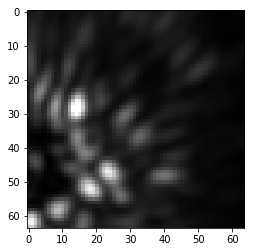

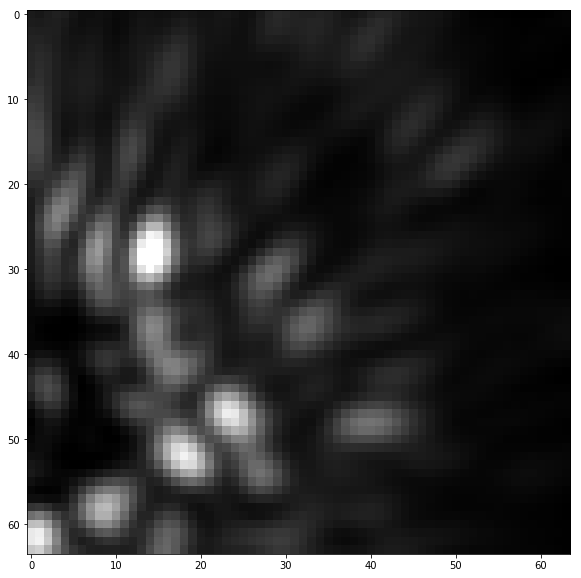

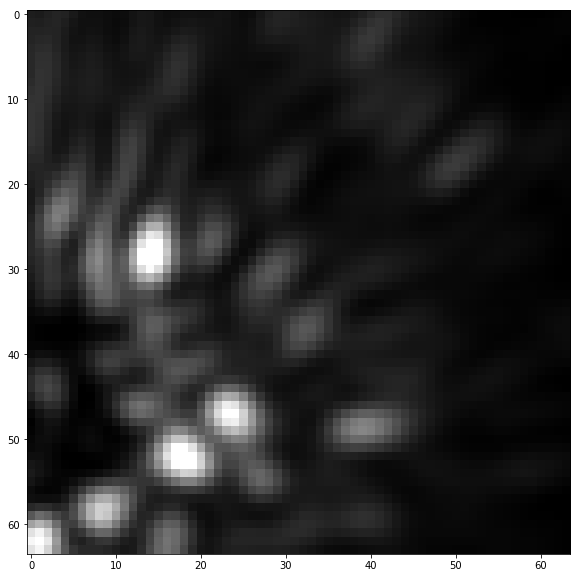

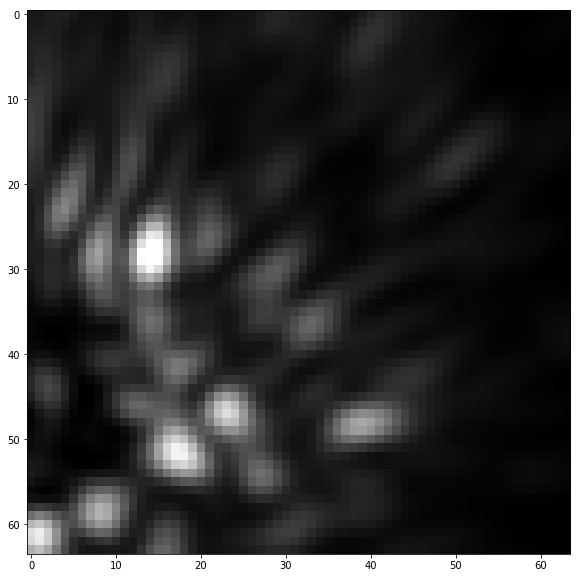

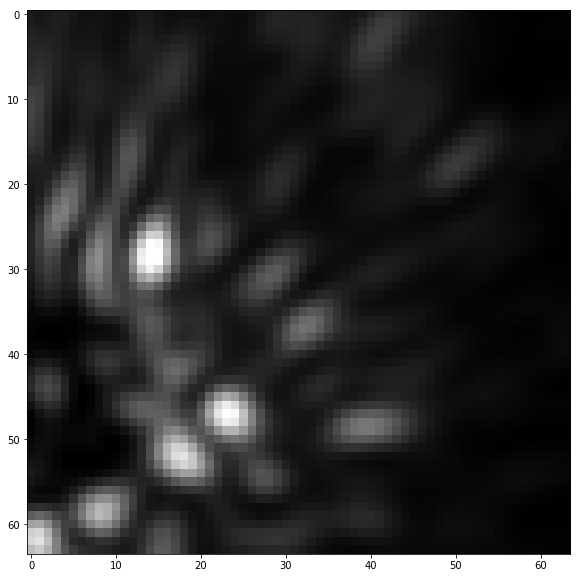

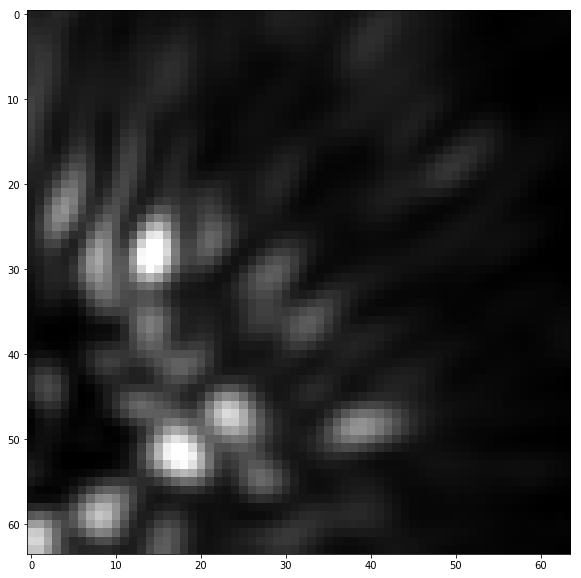

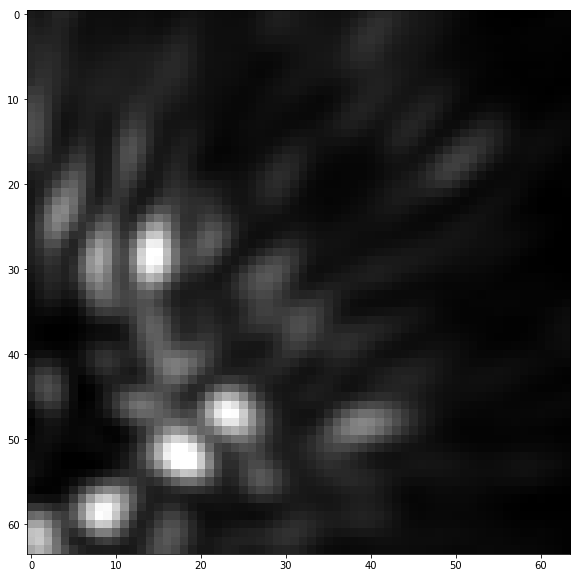

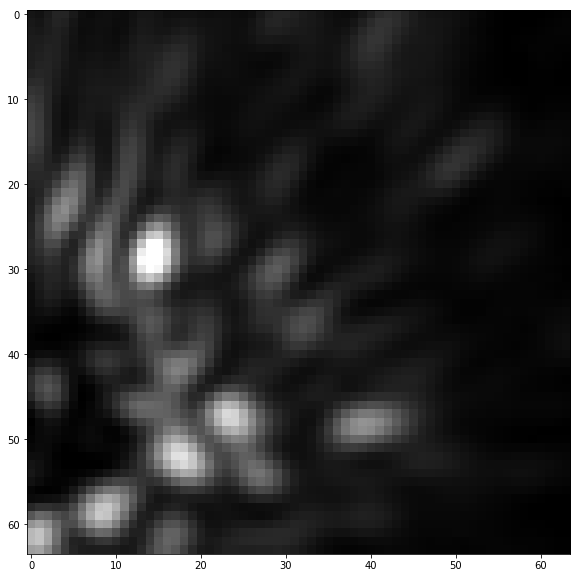

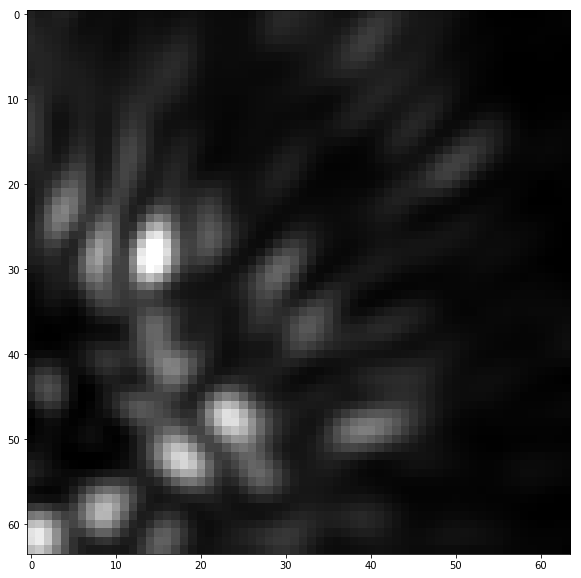

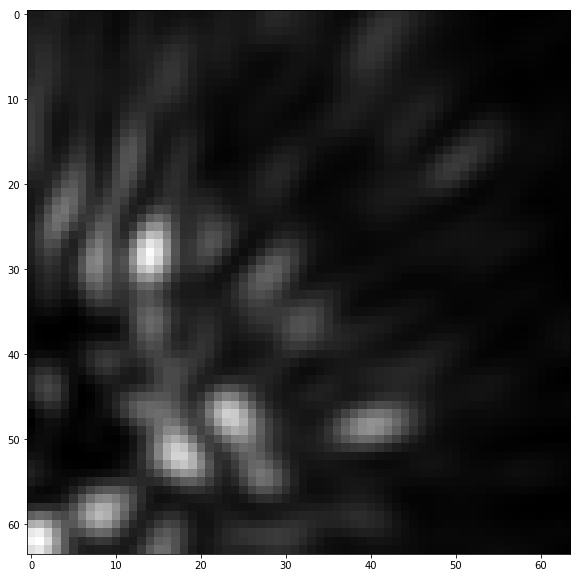

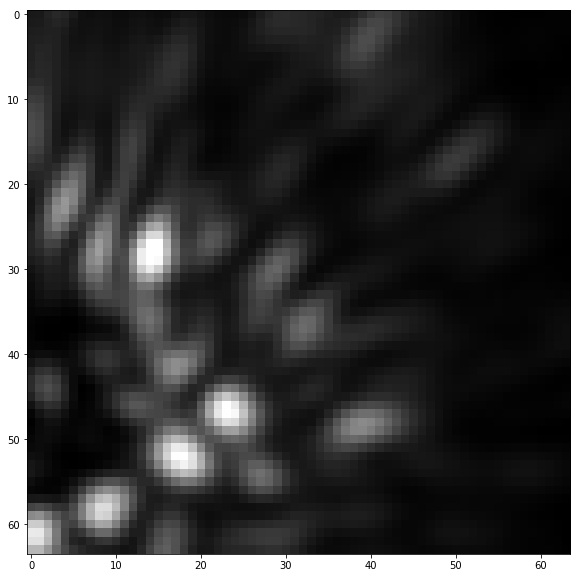

In [21]:

# ble = (cube[0,:,:]-min1)*(((max2-min2)/(max1-min1))+min2)
ble = cube_cut[0,:,:]

p2 = np.percentile(ble, 0.2)
p98 = np.percentile(ble, 99.8)
img_rescale = exposure.rescale_intensity(ble, in_range=(p2, p98))

pl.imshow(img_rescale, cmap=cmap)

# # pl.ion()
for i in range(10):
    pl.figure(figsize=(10,10))    
    img_rescale = exposure.rescale_intensity(cube_cut[i,:,:], in_range=(p2, p98))
    pl.imshow(img_rescale, cmap=cmap)
#     # pl.draw()
#     # time.sleep(1)
    

In [22]:
np.save(OUTFILENAME, cube_cut)